# Table of Contents
## 1. Import Libraries and Data
## 2. Clean Data
## 3. Elbow Technique
## 4. k-Means Clustering

# 1. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Display graphs w/o calling
%matplotlib inline

In [3]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design\A6 Project"
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

# 2. Clean Data

## Review Data

In [4]:
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  Pn4kpQ    16699     Sun          16  9/22/2013 16:10                72   
1  FHenrJ    16837     Fri          17  9/20/2013 17:44                72   
2  NAIdSB    14778     Sat          15  9/14/2013 15:52                72   
3  P7EP9i    19985     Thu          19  9/19/2013 19:25                72   
4  U0UCWc    19765     Mon          21  9/16/2013 21:54                72   

  start_station_name  start_station_latitude  start_station_longitude  \
0   W 52 St & 11 Ave               40.767272               -73.993929   
1   W 52 St & 11 Ave               40.767272               -73.993929   
2   W 52 St & 11 Ave               40.767272               -73.993929   
3   W 52 St & 11 Ave               40.767272               -73.993929   
4   W 52 St & 11 Ave               40.767272               -73.993929   

          end_time  end_station_id         end_station_name  \
0  9/22/2013 16:33             290          2 Ave & E 58 St   
1  9/20/2013 17:49             385          E 55 St & 2 Ave   
2  9/14/2013 15:56             305          E 58 St & 3 Ave   
3  9/19/2013 19:38             464          E 56 St & 3 Ave   
4  9/16/2013 22:09             367  E 53 St & Lexington Ave   

   end_station_latitude  end_station_longitude  trip_duration  subscriber  \
0             40.760203             -73.964785           1376  Subscriber   
1             40.757973             -73.966033            303  Subscriber   
2             40.760958             -73.967245            232  Subscriber   
3             40.759345             -73.967597            795  Subscriber   
4             40.758281             -73.970694            891  Subscriber   

   birth_year  gender  
0      1986.0       2  
1      1980.0       1  
2      1971.0       1  
3      1984.0       1  
4      1980.0       1

In [5]:
df.shape

(50000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

## Convert Weekdays to Numbers

In [7]:
df['weekday'].value_counts(dropna = False)

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [10]:
df.loc[df['weekday'] == 'Sun', 'day'] = 0
df.loc[df['weekday'] == 'Mon', 'day'] = 1
df.loc[df['weekday'] == 'Tue', 'day'] = 2
df.loc[df['weekday'] == 'Wed', 'day'] = 3
df.loc[df['weekday'] == 'Thu', 'day'] = 4
df.loc[df['weekday'] == 'Fri', 'day'] = 5
df.loc[df['weekday'] == 'Sat', 'day'] = 6

In [11]:
#Check results
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  Pn4kpQ    16699     Sun          16  9/22/2013 16:10                72   
1  FHenrJ    16837     Fri          17  9/20/2013 17:44                72   
2  NAIdSB    14778     Sat          15  9/14/2013 15:52                72   
3  P7EP9i    19985     Thu          19  9/19/2013 19:25                72   
4  U0UCWc    19765     Mon          21  9/16/2013 21:54                72   

  start_station_name  start_station_latitude  start_station_longitude  \
0   W 52 St & 11 Ave               40.767272               -73.993929   
1   W 52 St & 11 Ave               40.767272               -73.993929   
2   W 52 St & 11 Ave               40.767272               -73.993929   
3   W 52 St & 11 Ave               40.767272               -73.993929   
4   W 52 St & 11 Ave               40.767272               -73.993929   

          end_time  end_station_id         end_station_name  \
0  9/22/2013 16:33             290          2 Ave & E 58 St   
1  9/20/2013 17:49             385          E 55 St & 2 Ave   
2  9/14/2013 15:56             305          E 58 St & 3 Ave   
3  9/19/2013 19:38             464          E 56 St & 3 Ave   
4  9/16/2013 22:09             367  E 53 St & Lexington Ave   

   end_station_latitude  end_station_longitude  trip_duration  subscriber  \
0             40.760203             -73.964785           1376  Subscriber   
1             40.757973             -73.966033            303  Subscriber   
2             40.760958             -73.967245            232  Subscriber   
3             40.759345             -73.967597            795  Subscriber   
4             40.758281             -73.970694            891  Subscriber   

   birth_year  gender  day  
0      1986.0       2  0.0  
1      1980.0       1  5.0  
2      1971.0       1  6.0  
3      1984.0       1  4.0  
4      1980.0       1  1.0

## Convert Subscriber Status to Numbers

In [12]:
df['subscriber'].value_counts(dropna = False)

Subscriber        43021
Non-Subscriber     6979
Name: subscriber, dtype: int64

In [13]:
df.loc[df['subscriber'] == 'Subscriber', 'sub_status'] = 0
df.loc[df['subscriber'] == 'Non-Subscriber', 'sub_status'] = 1

In [14]:
#Check results
df.head(20)

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0   Pn4kpQ    16699     Sun          16  9/22/2013 16:10                72   
1   FHenrJ    16837     Fri          17  9/20/2013 17:44                72   
2   NAIdSB    14778     Sat          15  9/14/2013 15:52                72   
3   P7EP9i    19985     Thu          19  9/19/2013 19:25                72   
4   U0UCWc    19765     Mon          21  9/16/2013 21:54                72   
5   vpCEQt    17281     Mon          13  9/16/2013 13:32                72   
6   UDLZ0A    20360     Fri          17  9/20/2013 17:36                72   
7   ye1udA    20355     Thu          18  9/26/2013 18:57                72   
8   uwg21Z    19724     Wed          10  9/25/2013 10:09                72   
9   qk3BPG    17885     Sun          12   9/1/2013 12:43                72   
10  kK6SMz    17874     Tue          10  9/24/2013 10:16                72   
11  kS8B6A    18958     Thu           8   9/12/2013 8:20                72   
12  uFUwMc    17781     Fri          15   9/6/2013 15:25                72   
13  D5ZIwk    20526     Mon          16   9/2/2013 16:16                72   
14  VbKt7p    19605     Fri           9    9/6/2013 9:53                72   
15  tJ1NPb    15243     Wed           6   9/11/2013 6:58                72   
16  VNOck0    15570     Sat           9    9/7/2013 9:21                72   
17  2AMd24    14814     Sun          14  9/15/2013 14:39                72   
18  lYhZFf    17007     Wed           8   9/11/2013 8:26                72   
19  w1DnTG    18118     Sun          18  9/15/2013 18:13                72   

   start_station_name  start_station_latitude  start_station_longitude  \
0    W 52 St & 11 Ave               40.767272               -73.993929   
1    W 52 St & 11 Ave               40.767272               -73.993929   
2    W 52 St & 11 Ave               40.767272               -73.993929   
3    W 52 St & 11 Ave               40.767272               -73.993929   
4    W 52 St & 11 Ave               40.767272               -73.993929   
5    W 52 St & 11 Ave               40.767272               -73.993929   
6    W 52 St & 11 Ave               40.767272               -73.993929   
7    W 52 St & 11 Ave               40.767272               -73.993929   
8    W 52 St & 11 Ave               40.767272               -73.993929   
9    W 52 St & 11 Ave               40.767272               -73.993929   
10   W 52 St & 11 Ave               40.767272               -73.993929   
11   W 52 St & 11 Ave               40.767272               -73.993929   
12   W 52 St & 11 Ave               40.767272               -73.993929   
13   W 52 St & 11 Ave               40.767272               -73.993929   
14   W 52 St & 11 Ave               40.767272               -73.993929   
15   W 52 St & 11 Ave               40.767272               -73.993929   
16   W 52 St & 11 Ave               40.767272               -73.993929   
17   W 52 St & 11 Ave               40.767272               -73.993929   
18   W 52 St & 11 Ave               40.767272               -73.993929   
19   W 52 St & 11 Ave               40.767272               -73.993929   

           end_time  end_station_id                   end_station_name  \
0   9/22/2013 16:33             290                    2 Ave & E 58 St   
1   9/20/2013 17:49             385                    E 55 St & 2 Ave   
2   9/14/2013 15:56             305                    E 58 St & 3 Ave   
3   9/19/2013 19:38             464                    E 56 St & 3 Ave   
4   9/16/2013 22:09             367            E 53 St & Lexington Ave   
5   9/16/2013 13:44             228                    E 48 St & 3 Ave   
6   9/20/2013 17:49             440                    E 45 St & 3 Ave   
7   9/26/2013 19:15             419             Carlton Ave & Park Ave   
8   9/25/2013 10:20             281  Grand Army Plaza & Central Park S   
9    9/1/2013 13:54             281  Grand Army Plaza & Central Park 

## Convert Trip Duration to Mins

In [15]:
trip_dur_min = []

for value in df['trip_duration']:
    td_mins = value/60
    trip_dur_min.append(td_mins)

In [16]:
df['trip_dur_mins'] = trip_dur_min

In [17]:
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  Pn4kpQ    16699     Sun          16  9/22/2013 16:10                72   
1  FHenrJ    16837     Fri          17  9/20/2013 17:44                72   
2  NAIdSB    14778     Sat          15  9/14/2013 15:52                72   
3  P7EP9i    19985     Thu          19  9/19/2013 19:25                72   
4  U0UCWc    19765     Mon          21  9/16/2013 21:54                72   

  start_station_name  start_station_latitude  start_station_longitude  \
0   W 52 St & 11 Ave               40.767272               -73.993929   
1   W 52 St & 11 Ave               40.767272               -73.993929   
2   W 52 St & 11 Ave               40.767272               -73.993929   
3   W 52 St & 11 Ave               40.767272               -73.993929   
4   W 52 St & 11 Ave               40.767272               -73.993929   

          end_time  ...         end_station_name end_station_latitude  \
0  9/22/2013 16:33  ...          2 Ave & E 58 St            40.760203   
1  9/20/2013 17:49  ...          E 55 St & 2 Ave            40.757973   
2  9/14/2013 15:56  ...          E 58 St & 3 Ave            40.760958   
3  9/19/2013 19:38  ...          E 56 St & 3 Ave            40.759345   
4  9/16/2013 22:09  ...  E 53 St & Lexington Ave            40.758281   

   end_station_longitude  trip_duration  subscriber birth_year  gender  day  \
0             -73.964785           1376  Subscriber     1986.0       2  0.0   
1             -73.966033            303  Subscriber     1980.0       1  5.0   
2             -73.967245            232  Subscriber     1971.0       1  6.0   
3             -73.967597            795  Subscriber     1984.0       1  4.0   
4             -73.970694            891  Subscriber     1980.0       1  1.0   

   sub_status  trip_dur_mins  
0         0.0      22.933333  
1         0.0       5.050000  
2         0.0       3.866667  
3         0.0      13.250000  
4         0.0      14.850000  

[5 rows x 21 columns]

## Remove Unnecessary Columns

In [18]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'day',
       'sub_status', 'trip_dur_mins'],
      dtype='object')

In [19]:
#Create subset w/o unnecessary columns
df_fin = df.drop(['trip_id', 'bike_id', 'weekday', 'start_time', 'start_station_id', 'start_station_name', 'end_time', 
                  'end_station_id', 'end_station_name', 'trip_duration', 'subscriber', 'birth_year', 'gender'], axis=1)

In [20]:
#Check results
df_fin.head()

start_hour  start_station_latitude  start_station_longitude  \
0          16               40.767272               -73.993929   
1          17               40.767272               -73.993929   
2          15               40.767272               -73.993929   
3          19               40.767272               -73.993929   
4          21               40.767272               -73.993929   

   end_station_latitude  end_station_longitude  day  sub_status  trip_dur_mins  
0             40.760203             -73.964785  0.0         0.0      22.933333  
1             40.757973             -73.966033  5.0         0.0       5.050000  
2             40.760958             -73.967245  6.0         0.0       3.866667  
3             40.759345             -73.967597  4.0         0.0      13.250000  
4             40.758281             -73.970694  1.0         0.0      14.850000

## Clean Data

In [21]:
#Check for missing values
df_fin.isnull().sum()

start_hour                 0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
day                        0
sub_status                 0
trip_dur_mins              0
dtype: int64

In [22]:
#Check for duplicates
dups = df_fin.duplicated()
dups.shape

(50000,)

In [23]:
#Check for mixed types
for col in df_fin.columns.tolist():
  weird = (df_fin[[col]].applymap(type) != df_fin[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_fin[weird]) > 0:
    print (col)

No missing values, duplicates, or mixed type columns.

## Explore Lat/Long Values

In [25]:
station_unique = np.unique(df['start_station_id'])

In [26]:
len(station_unique)

330

In [27]:
lat_unique = np.unique(df_fin['start_station_latitude'])

In [28]:
len(lat_unique)

330

In [29]:
long_unique = np.unique(df_fin['start_station_longitude'])

In [30]:
len(long_unique)

330

Based on these results, each station's latitude and longitude is given to a level of accuracy such that there are unique latitude and longitude values for every station ID. This could be a better way to explore relationships with station locations because they are closer in value, whereas the station IDs are mostly clustered in the low hundreds but there are a handful around 2000 and 3000 which seem to skew results.

# 3. Exploratory Analysis

## Correlation Heat Map

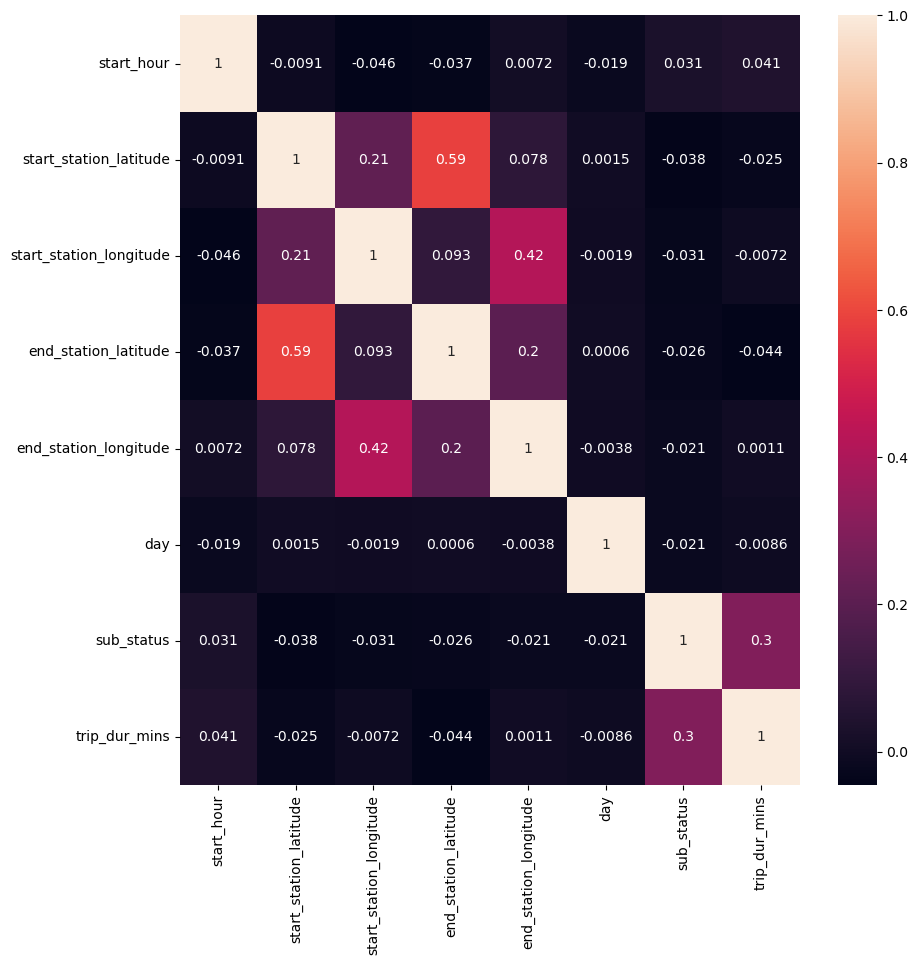

In [31]:
#Create subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Create correlation heatmap 
corr = sns.heatmap(df_fin.corr(), annot = True, ax = ax) 

Based on this heat map, it looks like there are moderate strength correlations between start and end station latitudes, start and end station longitudes, and subscriber status and trip duration, so I'm going to look at those more closely.

## Pair Plot

Based on the correlation heat map, I'm going to drop the columns that did not have any correlations (start_hour and day) and explore the remaining data with a pair plot.

In [32]:
df_pair = df_fin.drop(['start_hour', 'day'], axis=1)

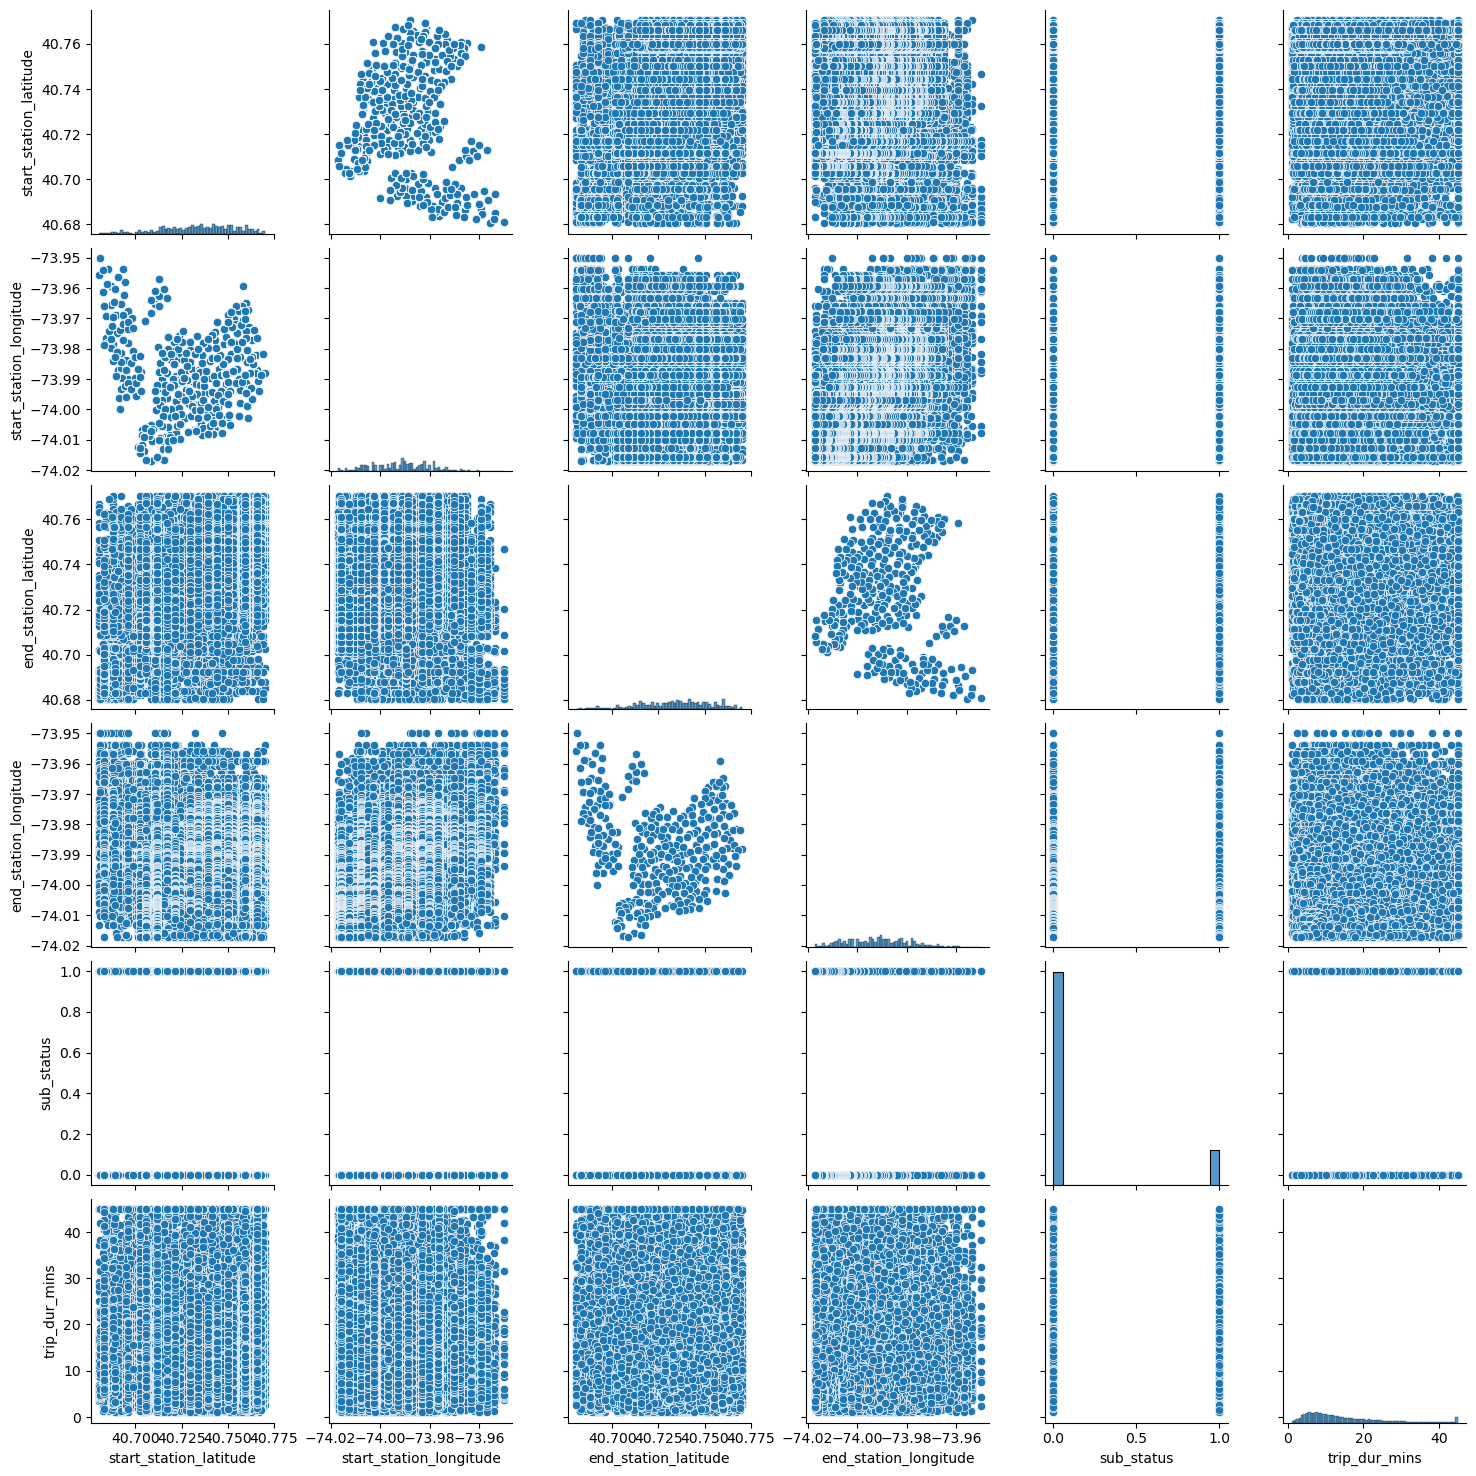

In [33]:
#Create pair plot 
pair = sns.pairplot(df_pair)

## Scatterplots

I want to take a closer look at the reported correlations between start and end latitude and start and end longitude using scatterplots and a best fit line.

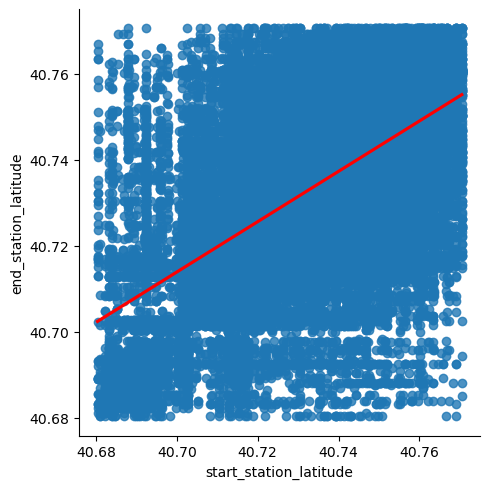

In [34]:
#Start vs. end station latitude 
sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = df_fin, line_kws={'color': 'red'})

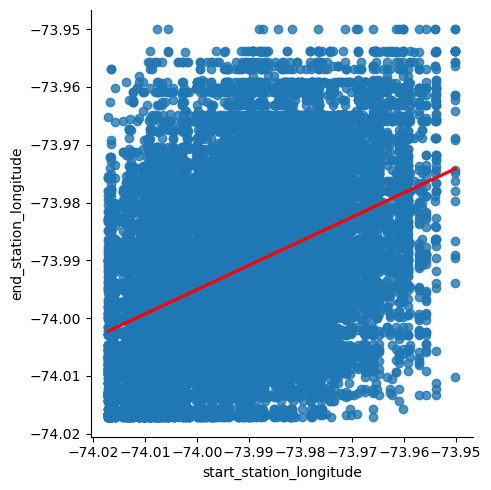

In [35]:
#Start vs. end station longitude
sns.lmplot(x = 'start_station_longitude', y = 'end_station_longitude', data = df_fin, line_kws={'color': 'red'})

Latitude and longitude indicates a point's vertical and horizontal position, respectively, from set points (the equator and prime meridian). Based on New York City's location, an increase in latitude indicates a point futher North, and an increase in longitude indicates a point further West. Based on the correlation map and these scatter plots, there is a positive correlation between start and end latitudes and start and end longitudes. I think this implies that users are not inclined to do particularly long trips with Citibike's. In other words, if they start at a certain latitude and longitude with smaller values, they are likely to end at a station with similarly low values.  

## Explore Statistics

In [36]:
df_fin.describe()

start_hour  start_station_latitude  start_station_longitude  \
count  50000.000000            50000.000000             50000.000000   
mean      14.145240               40.734170               -73.991109   
std        4.860541                0.019911                 0.012555   
min        0.000000               40.680342               -74.017134   
25%       10.000000               40.720196               -74.000271   
50%       15.000000               40.735877               -73.990765   
75%       18.000000               40.750020               -73.981923   
max       23.000000               40.770513               -73.950048   

       end_station_latitude  end_station_longitude           day  \
count          50000.000000           50000.000000  50000.000000   
mean              40.733859             -73.991351      2.930880   
std                0.019885               0.012569      1.991065   
min               40.680342             -74.017134      0.000000   
25%               40.720196             -74.001547      1.000000   
50%               40.735354             -73.991218      3.000000   
75%               40.749013             -73.982050      5.000000   
max               40.770513             -73.950048      6.000000   

         sub_status  trip_dur_mins  
count  50000.000000   50000.000000  
mean       0.139580      13.983048  
std        0.346554       9.561067  
min        0.000000       1.000000  
25%        0.000000       6.950000  
50%        0.000000      11.200000  
75%        0.000000      18.533333  
max        1.000000      44.950000

Some points of note: <br>
-The average trip start time is 2 pm <br>
-Based on the average values of station locations, trips are slightly more likely to travel southward and westward <br>
-Average trip duration is 14 minutes <br>

In [38]:
df_fin.groupby('sub_status').agg({'trip_dur_mins': ['mean', 'min', 'max']})

trip_dur_mins            
                    mean  min    max
sub_status                          
0.0            12.843723  1.0  44.95
1.0            21.006250  1.0  44.95

The result of this aggregation is definitely not what I was expecting. Based on a previous visualization from Task 6.2, I thought subscribers were morely to take longer trips, but this indicates the opposite. I want to explore trip variations between subscribers and non-subscribers a bit more.

## Subscribers v Non-Subscribers

In [39]:
df_sub = df_fin[df_fin['sub_status'] == 0]

In [40]:
df_non_sub = df_fin[df_fin['sub_status'] == 1]

In [41]:
df_sub.describe()

start_hour  start_station_latitude  start_station_longitude  \
count  43021.000000            43021.000000             43021.000000   
mean      14.084563               40.734477               -73.990952   
std        4.932676                0.019598                 0.012370   
min        0.000000               40.680342               -74.017134   
25%       10.000000               40.721101               -74.000040   
50%       15.000000               40.736245               -73.990765   
75%       18.000000               40.749718               -73.981948   
max       23.000000               40.770513               -73.950048   

       end_station_latitude  end_station_longitude           day  sub_status  \
count          43021.000000           43021.000000  43021.000000     43021.0   
mean              40.734069             -73.991245      2.947677         0.0   
std                0.019602               0.012375      1.930963         0.0   
min               40.680342             -74.017134      0.000000         0.0   
25%               40.720828             -74.000271      1.000000         0.0   
50%               40.735877             -73.990985      3.000000         0.0   
75%               40.749013             -73.982578      5.000000         0.0   
max               40.770513             -73.950048      6.000000         0.0   

       trip_dur_mins  
count   43021.000000  
mean       12.843723  
std         8.724368  
min         1.000000  
25%         6.583333  
50%        10.350000  
75%        16.650000  
max        44.950000

In [42]:
df_non_sub.describe()

start_hour  start_station_latitude  start_station_longitude  \
count  6979.000000             6979.000000              6979.000000   
mean     14.519272               40.732276               -73.992077   
std       4.371541                0.021644                 0.013603   
min       0.000000               40.680342               -74.017134   
25%      12.000000               40.715348               -74.002950   
50%      15.000000               40.733143               -73.991454   
75%      17.000000               40.750073               -73.981923   
max      23.000000               40.770513               -73.950048   

       end_station_latitude  end_station_longitude          day  sub_status  \
count           6979.000000            6979.000000  6979.000000      6979.0   
mean              40.732565             -73.992004     2.827339         1.0   
std                0.021499               0.013687     2.325015         0.0   
min               40.680342             -74.017134     0.000000         1.0   
25%               40.715348             -74.002950     0.000000         1.0   
50%               40.733320             -73.991475     3.000000         1.0   
75%               40.750073             -73.981923     5.000000         1.0   
max               40.770513             -73.950048     6.000000         1.0   

       trip_dur_mins  
count    6979.000000  
mean       21.006250  
std        11.331987  
min         1.000000  
25%        12.283333  
50%        19.616667  
75%        27.166667  
max        44.950000

Based on these statistics: <br>
-Roughly 86% of trips were taken by Subscribers <br>
-Non-subscribers on average start their trips slightly later than Subscribers <br>
-Subscribers on average move southwest, but Non-subscribers move northeast <br>
-Non-subscribers take longer trips on average than Subscribers

# 4. Regression Analysis

In [43]:
df_fin.head()

start_hour  start_station_latitude  start_station_longitude  \
0          16               40.767272               -73.993929   
1          17               40.767272               -73.993929   
2          15               40.767272               -73.993929   
3          19               40.767272               -73.993929   
4          21               40.767272               -73.993929   

   end_station_latitude  end_station_longitude  day  sub_status  trip_dur_mins  
0             40.760203             -73.964785  0.0         0.0      22.933333  
1             40.757973             -73.966033  5.0         0.0       5.050000  
2             40.760958             -73.967245  6.0         0.0       3.866667  
3             40.759345             -73.967597  4.0         0.0      13.250000  
4             40.758281             -73.970694  1.0         0.0      14.850000

## Start vs End Station Latitude

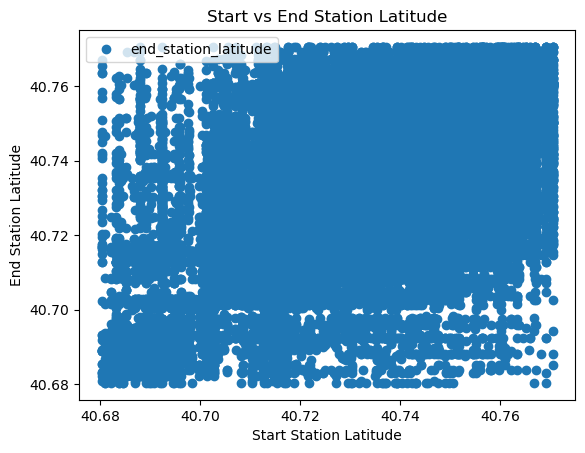

In [44]:
#Scatter plot
df_fin.plot(x = 'start_station_latitude', y='end_station_latitude',style='o') 
plt.title('Start vs End Station Latitude')  
plt.xlabel('Start Station Latitude')  
plt.ylabel('End Station Latitude')  
plt.show()

Hypothesis: trips tend to be short and therefore the end station latitude is close to the start station latitude

In [45]:
# Reshape variables into NumPy arrays
X = df_fin['start_station_latitude'].values.reshape(-1,1)
y = df_fin['end_station_latitude'].values.reshape(-1,1)

In [46]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
# Create regression object
regression = LinearRegression()

In [48]:
#Fit regression object to training set
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
#Predict y values
y_predicted = regression.predict(X_test)

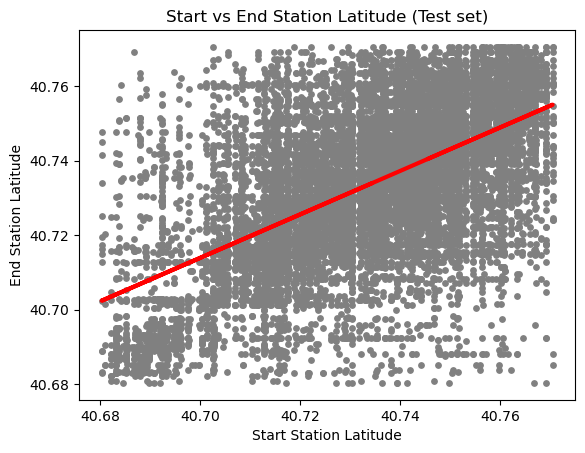

In [50]:
#Plot regression line on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Start vs End Station Latitude (Test set)')
plot_test.xlabel('Start Station Latitude')
plot_test.ylabel('End Station Latitude')
plot_test.show()

In [51]:
#Summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [52]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.58342412]]
Mean squared error:  0.0002610303487543478
R2 score:  0.34088595287703627


# 5. Clustering

In [53]:
#Define range of potential clusters and k-means clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [54]:
#Create score to judge cluster options
score = [kmeans[i].fit(df_fin).score(df_fin) for i in range(len(kmeans))] 
score

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\clust

[-5956100.964630725,
 -2827934.4916265174,
 -2072504.972706601,
 -1499556.1643303898,
 -1260453.0370629532,
 -1069055.2385814819,
 -958704.1610423591,
 -873610.3904292999,
 -798546.1811767785]

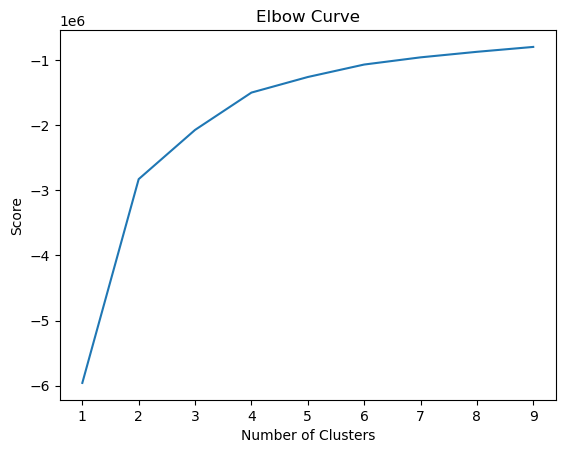

In [55]:
#Plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [56]:
#Create kmeans object
kmeans = KMeans(n_clusters = 4) 

In [57]:
#Fit k-means to df
kmeans.fit(df_fin)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [58]:
#Add cluster assignments to dataframe
df_fin['clusters'] = kmeans.fit_predict(df_fin)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
#Check results
df_fin.head()

start_hour  start_station_latitude  start_station_longitude  \
0          16               40.767272               -73.993929   
1          17               40.767272               -73.993929   
2          15               40.767272               -73.993929   
3          19               40.767272               -73.993929   
4          21               40.767272               -73.993929   

   end_station_latitude  end_station_longitude  day  sub_status  \
0             40.760203             -73.964785  0.0         0.0   
1             40.757973             -73.966033  5.0         0.0   
2             40.760958             -73.967245  6.0         0.0   
3             40.759345             -73.967597  4.0         0.0   
4             40.758281             -73.970694  1.0         0.0   

   trip_dur_mins  clusters  
0      22.933333         1  
1       5.050000         0  
2       3.866667         0  
3      13.250000         0  
4      14.850000         0

In [60]:
df_fin['clusters'].value_counts()

0    18025
3    14498
1    13059
2     4418
Name: clusters, dtype: int64

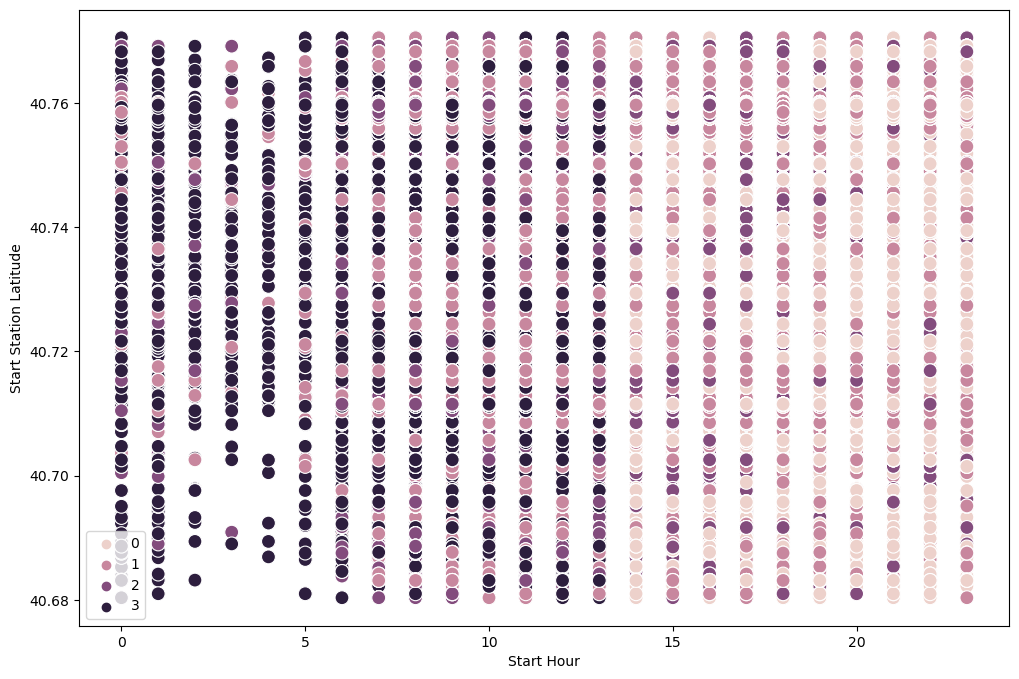

In [61]:
# Plot start_hour against start_station_latitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fin['start_hour'], y=df_fin['start_station_latitude'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Hour')
plt.ylabel('Start Station Latitude')
plt.show()

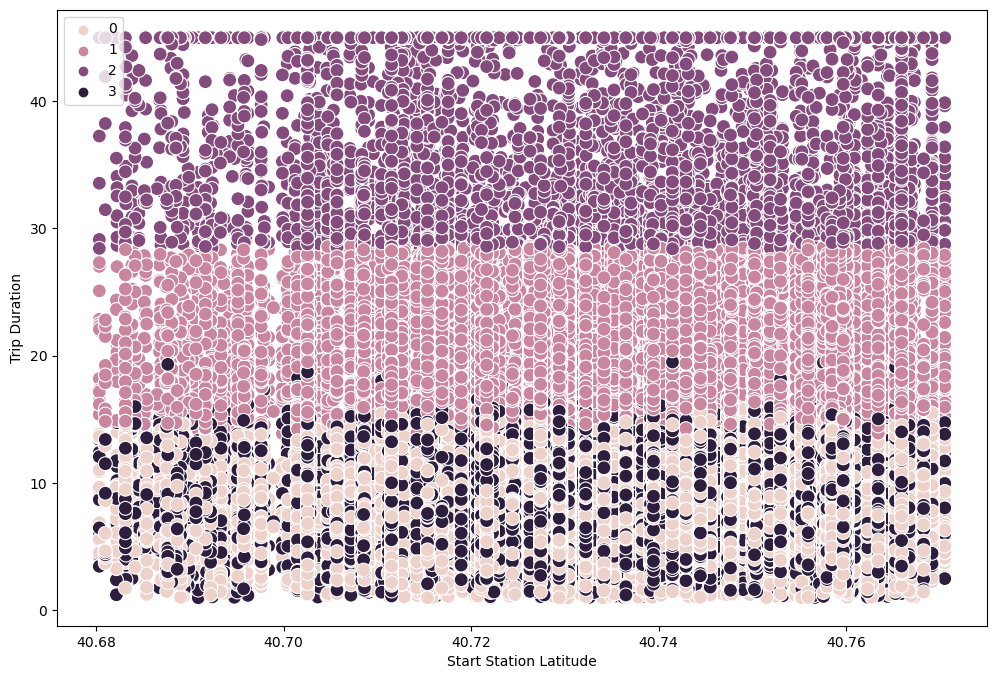

In [62]:
# Plot start_startion against trip duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fin['start_station_latitude'], y=df_fin['trip_dur_mins'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Station Latitude')
plt.ylabel('Trip Duration')
plt.show()

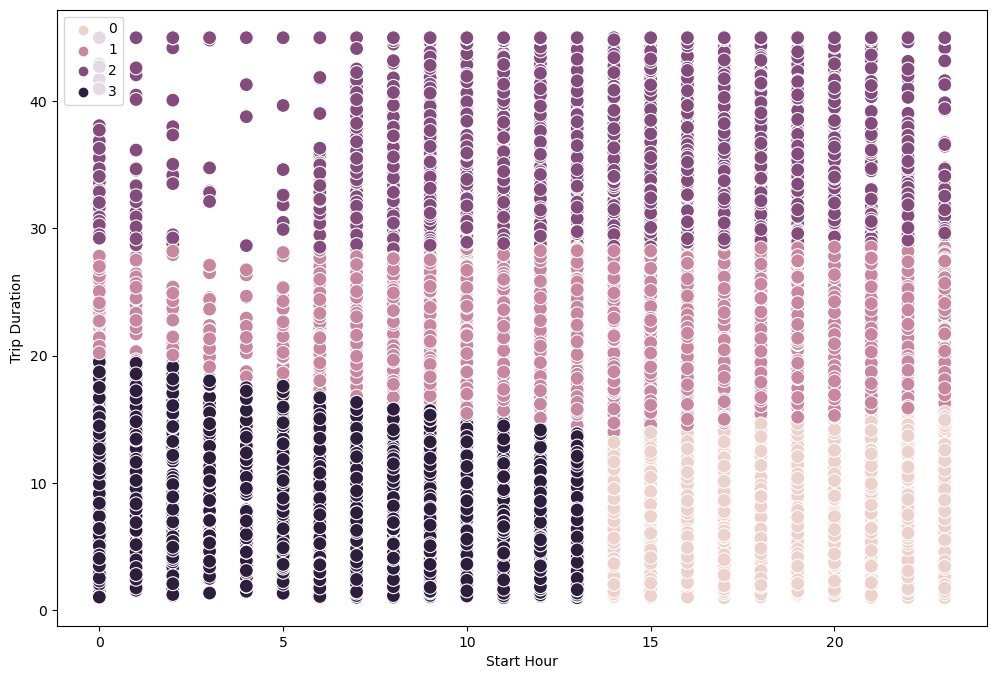

In [63]:
# Plot start time against trip duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_fin['start_hour'], y=df_fin['trip_dur_mins'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

Based on this plot, the 4 clusters seemed primarily influenced by start hour and trip duration. Groups 0 and 3 indicate trips of a short duration (under 20 minutes), with group 3 representing morning and early afternoon rides and group 0 indicating afternoon and evening rides. Groups 1 and 2 represent trips of all start hours, with group 1 representing moderate length rides (20-30 mins) and group 2 representing long rides (over 30 mins).

## Explore How Groups Break Down for Subs and Non-Subs

In [65]:
df_subs = df_fin[df_fin['sub_status'] == 0]

In [66]:
df_subs['clusters'].value_counts()

0    16549
3    13620
1     9971
2     2881
Name: clusters, dtype: int64

In [67]:
df_non_subs = df_fin[df_fin['sub_status'] == 1]

In [68]:
df_non_subs['clusters'].value_counts()

1    3088
2    1537
0    1476
3     878
Name: clusters, dtype: int64

In [69]:
df_subs.shape

(43021, 9)

In [72]:
print('Subscribers:')
print('Group 0 = ', 13623/43021*100)
print('Group 1 = ', 9968/43021*100)
print('Group 2 = ', 16549/43021*100)
print('Group 3 = ', 2881/43021*100)

Subscribers:
Group 0 =  31.665930592036446
Group 1 =  23.170079728504682
Group 2 =  38.46726017526325
Group 3 =  6.696729504195625


In [70]:
df_non_subs.shape

(6979, 9)

In [71]:
print('Non-Subscribers:')
print('Group 0 = ', 880/6979*100)
print('Group 1 = ', 3086/6979*100)
print('Group 2 = ', 1476/6979*100)
print('Group 3 = ', 1537/6979*100)

Non-Subscribers:
Group 0 =  12.609256340449921
Group 1 =  44.218369393895976
Group 2 =  21.149161771027366
Group 3 =  22.023212494626737


Group 0: start time >= 2 pm, duration <= 15-20 mins <br>
Group 1: start time any time, duration 15-30 mins <br>
Group 2: start time any time, duration 30+ mins <br>
Group 3: start time < 2 pm, duration 15-20 mins <br>

Majority of subscribers (69%) are group 0 and 2, so either short trips in the afternoon/evening or long trips at any time. The largest group of non-subscribers (44%) are group 1 (moderate-length trips at any time) and are least likely to be group 0 (short trips in the afternoon)